# Practical ESE - Machine Learning (CSD4207)

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------

### Name : Madhura Deshpande
### Roll No. : 11005

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------

##### Que. Assignment 5 - Online Retail Data

Problem Statement :
1) Read the data, find the summary. Perform the preprocessing operation if needed

2) Use the above data and group the data into different clusters. The number of clusters, the attributes for the cluster etc. is students choice.

3) Describe the result on the basis of different performance measures

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------

##### Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


##### Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.


##### Reference : 

https://archive.ics.uci.edu/ml/datasets/online+retail

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------

##### Loading the packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

##### Importing the dataset

In [2]:
retail = pd.read_csv('C:/Users/nihal/Desktop/Machine Learning/Online Retail.csv')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-10 08:26,3.39,17850.0,United Kingdom


In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The dataset has 8 columns and 541909 rows. The columns Quantity and UnitPrice are numerical. The columns InvoiceNo, StockCode,   Description and CustomerID are nominal. The column InvoiceDate contains date and time of each transaction.

In [4]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The negative Quantity represents the cancelled transactions. The 'C' in the starting of InvoiceNo in each transaction below represents that it is a cancelled transaction. There are total 10624 cancelled transactions as shown below :

In [5]:
retail['Quantity'] = retail['Quantity'].astype(float)
retail.loc[retail['Quantity']< 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1.0,12-01-10 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,12-01-10 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,12-01-10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,12-01-10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,12-01-10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11.0,12-09-11 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1.0,12-09-11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5.0,12-09-11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1.0,12-09-11 11:58,1.25,17315.0,United Kingdom


The transactions with negative UnitPrice are: 

In [6]:
retail.loc[retail['UnitPrice']< 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1.0,08-12-11 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1.0,08-12-11 14:52,-11062.06,NaN,United Kingdom


A bad debt expense is recognized when a receivable is no longer collectible because a customer is unable to fulfill their obligation to pay an outstanding debt due to bankruptcy or other financial problems. Hence, these values are negative. 

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------

##### Understanding of the problem statement and the data :

The given dataset has the customer purchase history with the details like product description, price, quantity and their country.The given problem is an example of customer segmentation. Customer segmentation is a way to split customers into groups based on certain characteristics that those customers share. These characteristics could be age, gender, locality, socio-economic factors like income, lifestyle, or other behavioral differences. 

<u>Advantages of Customer Segmentation:</u>

1. Customer segmentation can help in the formation of overall marketing strategy and promotion strategy.

2. A company can optimise their marketing budget by targeting similar customers of high value or those most likely to get the most returns.

3. A company can ensure that the messages they are delivering via email, on site, through digital ads, or other methods are targeted and relevant to the individual seeing it.

There are different techniques of performing customer segmentaion such as Demographic, Recency-frequency-monetary (RFM), High-value customer (HVCs), Customer status, Behavioral and Psychographic. Since the given data does not contain any information about customer's age, gender, behavoiur, socio-economic status, advertisement costs, marketing strategies, etc., only the Recency-frequency-monetary (RFM) and High-value customer (HVCs) methods can be used for the segmentation as these methods only require the customer purchase history.

##### Recency-frequency-monetary (RFM) Segmentation :

The RFM segmentation technique is the idea that marketers can gain an extensive understanding of their customers by analyzing three quantifiable factors. These are:

<u>Recency</u>: The amount of time since the customer’s most recent transaction.

<u>Frequency</u>: The total number of transactions made by the customer (during a defined period).

<u>Monetary</u>: The total amount that the customer has spent across all transactions (during a defined period).

These factors are used to segment the customers into different clusters according to their purchase history. RFM analysis can also be used to identify High-Value Customers (HVC). 

After calculating the above 3 factors, the unsupervised machine lerning algorithm **K-Means Clustering** can be used to form the actual clusters.

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------

### Data Cleaning :

In [7]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are missing values in the columns Description and CustomerID. But these values cannot be predicted by imputation, hence I have dropped the rows containing missing values.

In [8]:
retail = retail.dropna()
retail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
retail.shape

(406829, 8)

There are 406829 transactions after removing missing values.

Change data type of CustomerID to string as it identifies unique customers and the actual values does not have any meaning.

In [10]:
retail['CustomerID'] = retail['CustomerID'].astype(str)

Similarly, Convert InvoiceDate to proper datatype.

In [11]:
print('Before : ')
print(retail['InvoiceDate'][0])
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
print('After :')
print(retail['InvoiceDate'][0])

Before : 
12-01-10 08:26
After :
2010-12-01 08:26:00


##### -----------------------------------------------------------------------------------------------------------------------------------------------------------

### Data Preparation :

In [12]:
# Calculate Monetary for each customerID

retail['Monetary'] = retail['Quantity']*retail['UnitPrice']
monetary = retail.groupby('CustomerID')['Monetary'].sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [13]:
# Calculate Frequency for each customerID

frequency = retail.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [14]:
# Calculate Recency for each customerID

# The date and time of most recent transaction
max_date = max(retail['InvoiceDate'])
print(max_date)

# Time for each transaction is subtracted from max_date and the output is in days.
retail['Diff'] = (max_date - retail['InvoiceDate']).dt.days
recency = retail.groupby('CustomerID')['Diff'].min()
recency = recency.reset_index()
recency.head()

2011-12-09 12:50:00


,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [15]:
# Merging all dataframes into a single dataframe 

RFM = pd.merge(monetary, frequency, on='CustomerID', how='inner')
RFM = pd.merge(RFM, recency, on='CustomerID', how='inner')
RFM.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']
print(RFM.shape)
RFM.head()

(4372, 4)


,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


#### What about column 'Country'?

The column Country has the nominal data as strings of the country names of the customers. The k-Means algorithm is not applicable to categorical data, as categorical variables are discrete and do not have any natural origin. So computing euclidean distance for such variables is not meaningful. Hence, this column is not useful for clustering.

In [16]:
RFM.describe()

,Monetary,Frequency,Recency
count,4372.000000,4372.000000,4372.000000
mean,1898.459701,93.053294,91.047118
std,8219.345141,232.471608,100.765435
min,-4287.630000,1.000000,0.000000
25%,293.362500,17.000000,16.000000
50%,648.075000,42.000000,49.000000
75%,1611.725000,102.000000,142.000000
max,279489.020000,7983.000000,373.000000


There are 4372 unique customers. The average amount spent by any customer is 1898.46 units. The average frequency is 93.05 and the average recency is 91 days. The monetary ranges from -4287.63 to 279489.02 with median 648.075. The average frequency is 93 and the average recency is 91 days. The median frequency is 42 and the median recency is 49 days.

Since the range of the columns is wide, the appropiate scaling is needed.

#### Outliers Detection :

Since the K-Means Clustering is sensitive to outliers, we need to remove outliers for appropriate results.

Text(0.5, 0, 'Attributes')

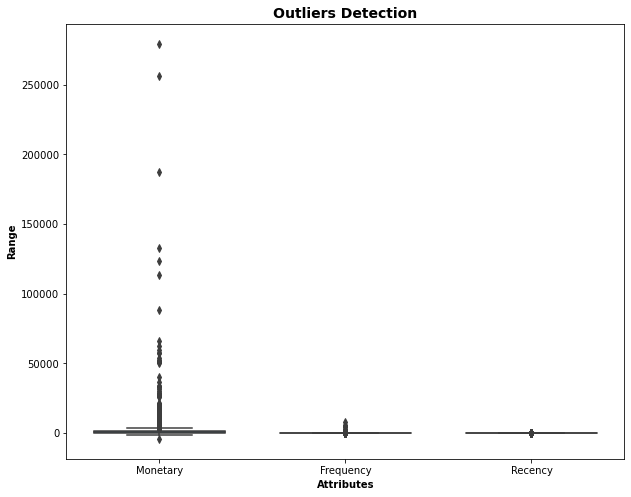

In [17]:
# Boxplots of RFM 

cols = ['Monetary','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = RFM[cols], orient="v",whis=1.5, width=0.7)
plt.title("Outliers Detection", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

The outliers can be observed in all 3 columns and need to be removed.

The outliers are the points that lie below lower limit = Q1 - 1.5xIQR or above upper limit = Q3 - 1.5xIQR

where, Q1 = First quartile

Q3 = Third quartile

IQR = Inter-quartile Range = Q3 - Q1

In [18]:
# Removing outliers

for col in cols:
    Q1 = RFM[col].quantile(0.05)
    Q3 = RFM[col].quantile(0.95)
    IQR = Q3 - Q1
    RFM = RFM[(RFM[col] >= Q1 - 1.5*IQR) & (RFM[col] <= Q3 + 1.5*IQR)]

#### Scaling the data :

In [19]:
# Standardization of the data 

scaler = StandardScaler()

# fit_transform
RFM_scaled = scaler.fit_transform(RFM[['Monetary', 'Frequency', 'Recency']])

RFM_scaled = pd.DataFrame(RFM_scaled)
RFM_scaled.columns = ['Monetary', 'Frequency', 'Recency']
RFM_scaled.head()

,Monetary,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


##### -----------------------------------------------------------------------------------------------------------------------------------------------------------

### Model Building : K-Means Clustering

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created. It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training. It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

#### Determining the optimum K using the elbow method

The performance of the K-means clustering algorithm depends upon highly efficient clusters that it forms. But choosing the optimal number of clusters is a big task. I have used elbow method for the determination of k. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. Since the graph shows the sharp bend, which looks like an elbow, hence it is known as the elbow method. The corner point where the curve bends like an elbow is the optimum number of clusters.

In [20]:
WCSS = []
k_range = range(1,10) 
for k in k_range:
    kmeans = KMeans(n_clusters=k, max_iter=50, random_state = 0)
    kmeans.fit(RFM_scaled)
    
    WCSS.append(kmeans.inertia_)
print(WCSS)

[12879.000000000004, 7661.701161911681, 4433.580619302109, 3360.4040493786642, 2802.8241284834658, 2392.128914542905, 2038.9947295153845, 1826.396227451592, 1656.6431459323398]


Text(0.5, 0, 'No, of clusters')

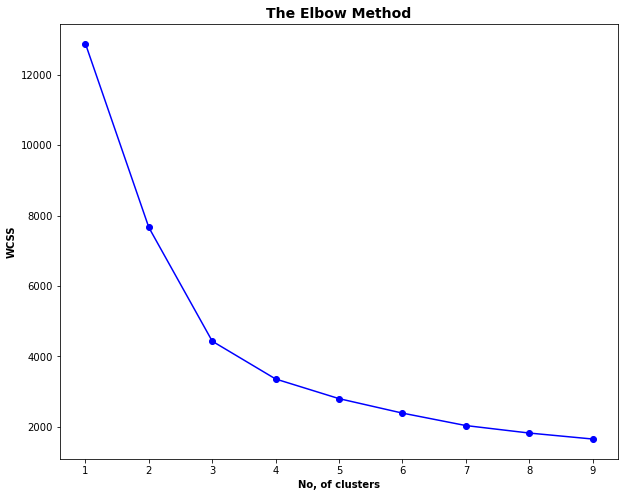

In [21]:
plt.rcParams['figure.figsize'] = [10,8]
plt.plot(k_range, WCSS, '-ok', color = 'blue')
plt.title("The Elbow Method", fontsize = 14, fontweight = 'bold')
plt.ylabel("WCSS", fontweight = 'bold')
plt.xlabel("No, of clusters", fontweight = 'bold')

The curve bends at k = 3 and then it becomes smooth for k >4. Hence, we choose k = 3 as optimum no. of clusters.

In [22]:
# k-means clustering with k = 3

kmeans = KMeans(n_clusters=3, max_iter=10, random_state = 0, init = 'random')
kmeans.fit(RFM_scaled)

KMeans(init='random', max_iter=10, n_clusters=3, random_state=0)

In [23]:
# assign the label to the customers
RFM['ClusterID'] = kmeans.labels_
RFM.head()

,CustomerID,Monetary,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


I specified the initial centroids for getting the same ClusterIDs everytime for better visualizations. It can be observes in the above dataframe that the first 3 transactions belong to 3 different clusters, so I specified these transactions as the initial centroids.

In [24]:
kmeans = KMeans(n_clusters=3, max_iter=50, random_state = 0, init = RFM_scaled.loc[:2])
kmeans.fit(RFM_scaled)

C:\Users\nihal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


KMeans(init=   Monetary  Frequency   Recency
0 -0.723738  -0.752888  2.301611
1  1.731617   1.042467 -0.906466
2  0.300128  -0.463636 -0.183658,
       max_iter=50, n_clusters=3, random_state=0)

In [25]:
# assign the label to the customers
RFM['ClusterID'] = kmeans.labels_
RFM.head()

,CustomerID,Monetary,Frequency,Recency,ClusterID
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,0


In [26]:
RFM.groupby('ClusterID').median()

,Monetary,Frequency,Recency
ClusterID,,,
0,288.920,17.0,244.5
1,4122.280,265.0,10.0
2,691.135,45.0,34.0


##### -----------------------------------------------------------------------------------------------------------------------------------------------------------

### Visualizations of Customer Segmentation :

Text(0.5, 0, 'Cluster ID')

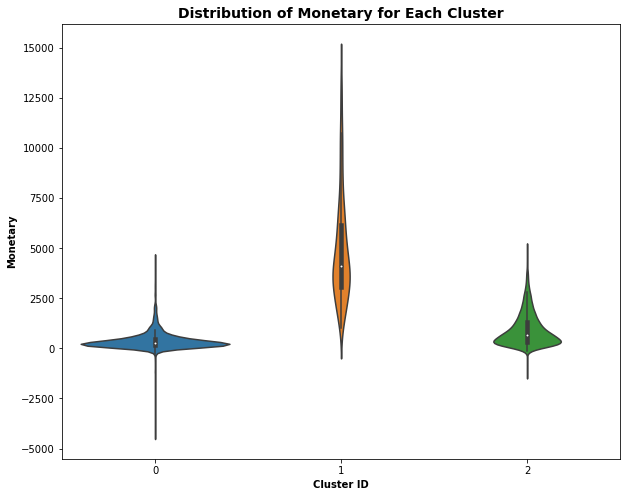

In [27]:
plt.rcParams['figure.figsize'] = [10,8]
sns.violinplot(x='ClusterID', y='Monetary', data=RFM)
plt.title("Distribution of Monetary for Each Cluster", fontsize = 14, fontweight = 'bold')
plt.ylabel("Monetary", fontweight = 'bold')
plt.xlabel("Cluster ID", fontweight = 'bold')

Both Cluster 0 and cluster2 have very less median monetary, but the distribution of monetary for cluster 0 is symmetric and that of cluster 2 is positively skewed. So, the customers in the cluster 0 are contributing the most in cancelled transactions and further investigation is needed to prevent the cancellations in future. 

Cluster 1 has the median monetary of 4122 units and these are the High-Value customers contributing  the most in the revenue. The distribution is positively skewed.

Text(0.5, 0, 'Cluster ID')

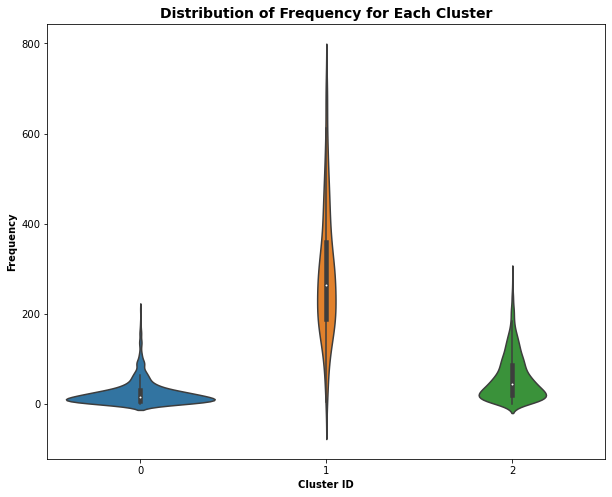

In [28]:
plt.rcParams['figure.figsize'] = [10,8]
sns.violinplot(x='ClusterID', y='Frequency', data=RFM)
plt.title("Distribution of Frequency for Each Cluster", fontsize = 14, fontweight = 'bold')
plt.ylabel("Frequency", fontweight = 'bold')
plt.xlabel("Cluster ID", fontweight = 'bold')

The customers in cluster 1 have the maximum median frequency of 265. These are the most loyal and High-Value customers.

The customers in cluster 0 and cluster 2 are not very frequent. Both these distributions are positively skewed. Appropriate strategies should be applied to these customers in order to increase their frequency. 

Text(0.5, 0, 'Cluster ID')

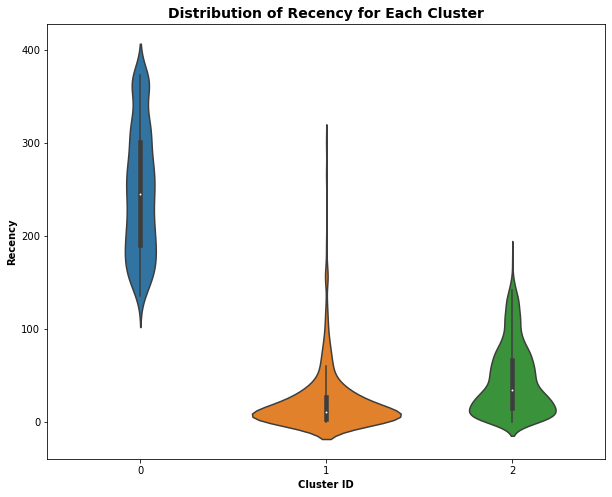

In [29]:
plt.rcParams['figure.figsize'] = [10,8]
sns.violinplot(x='ClusterID', y='Recency', data=RFM)
plt.title("Distribution of Recency for Each Cluster", fontsize = 14, fontweight = 'bold')
plt.ylabel("Recency", fontweight = 'bold')
plt.xlabel("Cluster ID", fontweight = 'bold')

The customers in cluster 1 and cluster 2 have very less median recency (10 days and 34 days, respectively). These customers could be shopping from the store very often or they got to know about the store very recently. In both the cases, these customers are valuable to the store.

The customers in the cluster 0 have median recency of 244 days. These customers are not frquently shopping from the store. The distribution is positively skewed. The actions must be taken to get these customers back in the store.

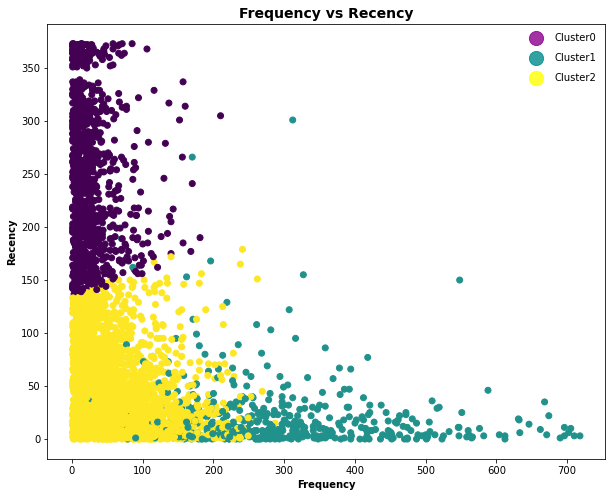

In [30]:
plt.rcParams['figure.figsize'] = [10,8]
plt.scatter('Frequency', 'Recency', data=RFM, c = 'ClusterID', label = None)
plt.title('Frequency vs Recency', fontsize = 14, fontweight = 'bold')
plt.ylabel("Recency", fontweight = 'bold')
plt.xlabel("Frequency", fontweight = 'bold')

for p,clr in zip(['Cluster0', 'Cluster1', 'Cluster2'],['darkmagenta','darkcyan','yellow']):
    plt.scatter([], [], alpha=0.8, label=p, c = clr, s = 200)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1)

The customers in cluster 0 have more recency and less frequency, so these customers shopped from the store in the past and then never returned. The customers in cluster 2 have moderate frequency and moderate recency.

The customers in cluster 1 have more frequency and less recency, so they are loyal customers of the store. 

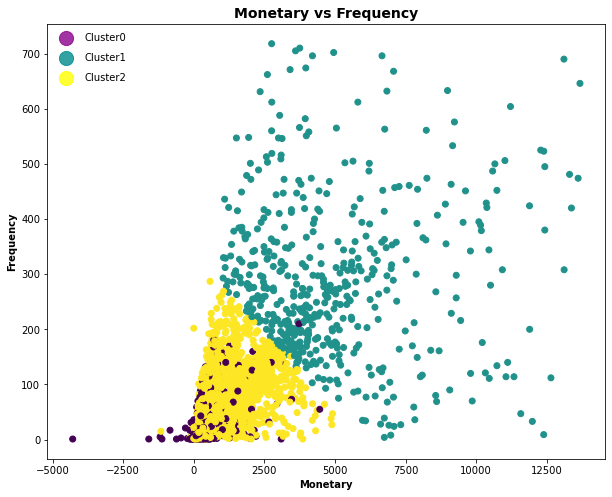

In [31]:
plt.rcParams['figure.figsize'] = [10,8]
plt.scatter('Monetary', 'Frequency', data=RFM, c = 'ClusterID', label = None)
plt.title("Monetary vs Frequency", fontsize = 14, fontweight = 'bold')
plt.ylabel("Frequency", fontweight = 'bold')
plt.xlabel("Monetary", fontweight = 'bold')

for p,clr in zip(['Cluster0', 'Cluster1', 'Cluster2'],['darkmagenta','darkcyan','yellow']):
    plt.scatter([], [], alpha=0.8, label=p, c = clr, s = 200)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1)

The clusters 0 and 1 almost overlap each other. They have monetary between 0 to 5000 and frequency between 0 to 300. 

The customers in cluster 1 are high-value customers having more frequency and more monetary.

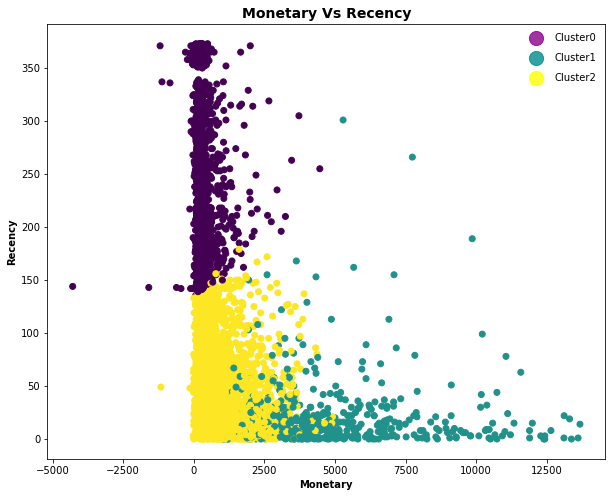

In [32]:
plt.rcParams['figure.figsize'] = [10,8]
plt.scatter('Monetary', 'Recency', data=RFM, c = 'ClusterID', label = None)
plt.title("Monetary Vs Recency", fontsize = 14, fontweight = 'bold')
plt.ylabel("Recency", fontweight = 'bold')
plt.xlabel('Monetary', fontweight = 'bold')

for p,clr in zip(['Cluster0', 'Cluster1', 'Cluster2'],['darkmagenta','darkcyan','yellow']):
    plt.scatter([], [], alpha=0.8, label=p, c = clr, s = 200)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1)

The customers in cluster 0 have more recency but less monetary. The customers in cluster 2 have less recency as well as less monetary.

The customers in cluster 1 have more monetary and less recency, again concluding that these customers are loyal and important.

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------

### Conclusion of the Customer Segmentation:

1. The customers in cluster 1 are the High-Value customers. They are loyal, frequent and contribute to the revenue with high monetary value. So providing good customer service to these customers should be the priority of the store.

2. The customers in cluster 2 are moderately frequent and have moderate recency.  

3. The customers in cluster 0 are new to the store or shopped in the store in the past but don't come back very often.

4. The customers in clusters 0 and 2 could be drawn back  to the store by offers and discounts. Special advertisement and marketing strategies can be made for these customers.

5. By further analysis of the clusters with respect to the countries, different strategies can be made for different countries.

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------

### References :

1. https://cloud.google.com/blog/products/data-analytics/creating-actionable-customer-segmentation-models

2. https://www.optimove.com/resources/learning-center/rfm-segmentation

3. https://towardsdatascience.com/clustering-algorithm-for-data-with-mixed-categorical-and-numerical-features-d4e3a48066a0

4. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

5. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------